Use o código abaixo para gerar os dados das classes 1 e 2 nos vetores x1 e x2.
Reduza a dimensão do problema para um problema de classificação bidimenssional ou unidimensional e implemente o classificador com o uso de um discriminante linear ou de um perceptron.

s1 = randn(2,100)+10;

s2 = randn(2,100)-10;

A = [ 0 0; 1 -1.1 ; -1 1 ];

x1 = A*s1+randn(3,100)*0.1;

x2 = A*s2+randn(3,100)*0.1;




OBS: Esses vetores/matrizes foram criadas no matlab e exportada usando CSV. Então ao invés de gerar no Python esses dados serão importados.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline
%pylab inline

#importando os dados gerados no MatLab
df = pd.read_csv("x1.csv",decimal=',',header=None)
df_x1 = df.T
y1 = [1]*100

df = pd.read_csv("x2.csv",decimal=',',header=None)
df_x2 = df.T
y2 = [2]*100

df_x = pd.concat([df_x1, df_x2])
df_y = pd.concat([pd.DataFrame(y1, columns=['classe']), pd.DataFrame(y2, columns=['classe'])])
y = np.concatenate((y1,y2))
y

Populating the interactive namespace from numpy and matplotlib


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
df_x1.head()

,0,1,2
0,0.026965,-2.430178,1.147906
1,-0.102026,-4.251937,3.131986
2,0.112874,0.728226,-1.500298
3,0.047542,-1.693067,0.788911
4,-0.065682,-0.616124,-0.793411


In [7]:
df_x2.head()

,0,1,2
0,0.190851,2.328195,-1.108291
1,-0.022692,1.595204,-0.573155
2,0.055576,0.456378,0.226802
3,-0.109787,2.155463,-1.196935
4,-0.041125,0.961521,-0.119813


In [58]:
#concatenando as duas classes no mesmo dataframe
df_all_data = pd.concat([df_x, df_y], axis = 1)
df_all_data.head()

,0,1,2,classe
0,0.026965,-2.430178,1.147906,1
1,-0.102026,-4.251937,3.131986,1
2,0.112874,0.728226,-1.500298,1
3,0.047542,-1.693067,0.788911,1
4,-0.065682,-0.616124,-0.793411,1


In [59]:
df_all_data.tail()

,0,1,2,classe
95,0.055095,0.813698,0.169080,2
96,-0.106493,1.381456,-0.498016,2
97,-0.105310,0.386917,0.667085,2
98,0.176899,-1.216166,2.322866,2
99,-0.028276,0.228342,0.702308,2


C:\Users\Tiago-note\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tiago-note\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


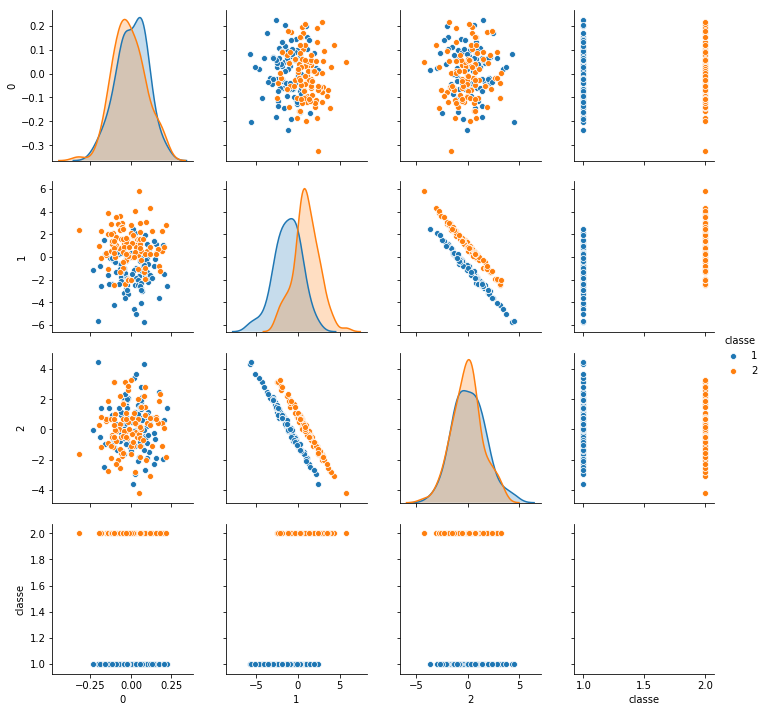

In [60]:
sns.pairplot(df_all_data,hue='classe')

Podemos observar que é possivel tornar o problema unidimenssional quando verificamos o gráfico formado pelas features 1 e 2.

In [61]:
lda = LinearDiscriminantAnalysis(n_components=1)

#Aplicando LDA para um componente
X_r1 = lda.fit(df_x.values, y).transform(df_x.values)
size(X_r1[y == 1, 0])

100

Text(0.5, 1.0, 'LDA do Exercicio 4 da P2 de IA - UFABC')

<Figure size 432x288 with 0 Axes>

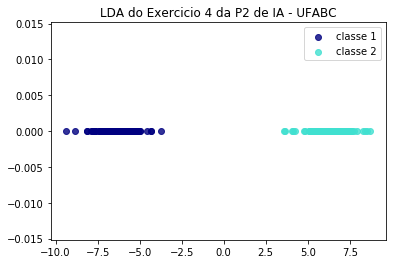

In [62]:
plt.figure()
colors = ['navy', 'turquoise']
lw = 1

plt.figure()
y_plot = [0]*100
for color, i, target_name in zip(colors, [1,2], ['classe 1','classe 2']):
    plt.scatter(X_r1[y == i, 0], y_plot, alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA do Exercicio 4 da P2 de IA - UFABC')

In [63]:
#Implementação do perceptron feito para o Exercício 2b
size(X_r1)
size(y)

200

In [64]:
#Classe que implementa perceptron
class Perceptron(object):

    def __init__(self, n_iteracoes=1000, L_rate=0.01 ):
        self.n_iteracoes = n_iteracoes
        self.L_rate = L_rate
        
    def realizar_fit(self, X, y): 
        self.coeficiente_ = np.zeros(X.shape[1])
        self.inter = 0
        self.erros = []
        for _ in range (self.n_iteracoes):
            erro = 0.0
            for xi, v_real in zip (X, y):
                update = self.L_rate * (v_real - self.predicao(xi))
                self.coeficiente_       += update * xi
                self.inter  += update
                erro           += int(update != 0.0)
            self.erros.append (erro)
            
        return self

    def entrada(self, X):
        return np.dot(X, self.coeficiente_) + self.inter

    def predicao (self, X):
        result = self.entrada(X)
        if result < -2:
            return 0
        elif result > 2:
            return 2
        else:
            return 1
        
    def score(self, X, y):
        results = np.array([self.predicao(xi) for xi in X])
        
        return np.sum(results == y) / len(y)

In [65]:
#Biblioteca para facilitar a separação dos dataset em dados de traino e teste
from sklearn.model_selection import train_test_split


percep = Perceptron( L_rate = 0.3 , n_iteracoes = 1500 )

#vamos utilizar 30% dos dados para ser o conjunto de teste ficando 70% dos dados para treino
X_treino, X_teste, Y_treino, Y_teste = train_test_split( X_r1 , y,test_size=0.3,random_state=30)

#executar treinamento
modelo_per = percep.realizar_fit( X_treino , Y_treino )

#verificar o score de classificação
score = modelo_per.score(  X_teste , Y_teste )

print(score)

1.0


Perceba que para o Perceptron está sendo usado a variavel X_r1, que são os valores de X depois da transformação do LDA.
COmo era de se esperar pelo que vimos em ambos os gráficos, o conjunto de dados é perfeitamente separavel.
Sendo assim era de se esperar que o perceptron conseguisse separar as classes sem nenhum erro.

Bem é isso. Valeu professor, até!